# 회원 탈퇴를 예측하는 테크닉

In [1]:
import pandas as pd
customer = pd.read_csv("./pyda100-master/5장/customer_join.csv")
uselog_months = pd.read_csv("./pyda100-master/5장/use_log_months.csv")

In [2]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,종일,10500,일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,종일,10500,일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,종일,10500,일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,종일,10500,일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,야간,6000,일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,종일,10500,일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,종일,10500,일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,야간,6000,일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,종일,10500,일반,11.000000,11.0,11,11,0,2019-04-30,1


In [3]:
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [4]:
year_months = list(uselog_months['연월'].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)) :
    tmp = uselog_months.loc[uselog_months['연월']==year_months[i]]
    tmp.rename(columns={'count':'count_0'}, inplace=True)
    
    tmp_before = uselog_months.loc[uselog_months['연월']==year_months[i-1]]
    del tmp_before['연월']
    tmp_before.rename(columns={'count':'count_1'}, inplace=True)
    
    tmp = pd.merge(tmp, tmp_before, on='customer_id', how='left')
    uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog

C:\Users\jsj26\Anaconda3\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\jsj26\Anaconda3\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\jsj26\Anaconda3\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\jsj26\Anacond

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0
...,...,...,...,...
33846,201903,TS995853,8,11.0
33847,201903,TS998593,8,7.0
33848,201903,TS999079,3,2.0
33849,201903,TS999231,6,6.0


In [5]:
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
for i in range(len(exit_customer)):
    exit_customer["exit_date"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1)
exit_customer['exit_date'] = pd.to_datetime(exit_customer["exit_date"])
exit_customer["연월"] = exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["연월"] = uselog["연월"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "연월"], how="left")
exit_uselog

<ipython-input-5-46c029f46cf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["exit_date"] = None
<ipython-input-5-46c029f46cf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
C:\Users\jsj26\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33847,201903,TS998593,8,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33848,201903,TS999079,3,2.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
33849,201903,TS999231,6,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [6]:
exit_uselog = exit_uselog.dropna(subset=['name'])
exit_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,6000.0,일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28
30787,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6000.0,입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28
30827,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,7500.0,입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28
30842,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,7500.0,일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28


In [7]:
len(exit_uselog['customer_id'].unique())

1104

In [8]:
# 지속 회원
conti_customer = customer.loc[customer["is_deleted"]==0]
conti_uselog = pd.merge(uselog, conti_customer, on=['customer_id'], how='left')
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,야간,6000.0,일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,종일,10500.0,일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,종일,10500.0,입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,종일,10500.0,일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,야간,6000.0,일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,XXXX,C01,M,2019-02-08,NaN,CA1,...,종일,10500.0,일반,9.500000,9.5,11.0,8.0,1.0,2019-04-30,2.0
33847,201903,TS998593,8,7.0,XXXXX,C03,M,2018-09-01,NaN,CA1,...,야간,6000.0,일반,8.142857,8.0,9.0,7.0,1.0,2019-04-30,7.0
33848,201903,TS999079,3,2.0,XXX,C03,M,2016-06-01,NaN,CA1,...,야간,6000.0,일반,4.916667,5.5,9.0,2.0,1.0,2019-04-30,34.0
33849,201903,TS999231,6,6.0,XXXX,C01,M,2017-03-01,NaN,CA1,...,종일,10500.0,일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,25.0


In [9]:
conti_uselog = conti_uselog.dropna(subset=['name'])
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,야간,6000.0,일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,종일,10500.0,일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,종일,10500.0,입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,종일,10500.0,일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,야간,6000.0,일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,XXXX,C01,M,2019-02-08,NaN,CA1,...,종일,10500.0,일반,9.500000,9.5,11.0,8.0,1.0,2019-04-30,2.0
33847,201903,TS998593,8,7.0,XXXXX,C03,M,2018-09-01,NaN,CA1,...,야간,6000.0,일반,8.142857,8.0,9.0,7.0,1.0,2019-04-30,7.0
33848,201903,TS999079,3,2.0,XXX,C03,M,2016-06-01,NaN,CA1,...,야간,6000.0,일반,4.916667,5.5,9.0,2.0,1.0,2019-04-30,34.0
33849,201903,TS999231,6,6.0,XXXX,C01,M,2017-03-01,NaN,CA1,...,종일,10500.0,일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,25.0


In [10]:
# 탈퇴 데이터 1104, 지속 데이터 27422개이므로 한 회원 당 하나의 데이터만 존재하도록 지속 데이터를 undersampling하자.
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset=['customer_id'])
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201901,OA023562,7,8.0,XXXXX,C03,F,2018-06-12,NaN,CA2,...,야간,6000.0,입회비반액할인,7.900000,8.0,10.0,6.0,1.0,2019-04-30,10.0
1,201808,IK904385,3,6.0,XXXX,C02,F,2016-08-01,NaN,CA1,...,주간,7500.0,일반,5.000000,5.5,7.0,2.0,1.0,2019-04-30,32.0
2,201809,TS493191,4,8.0,XX,C03,F,2017-11-01,NaN,CA1,...,야간,6000.0,일반,6.750000,6.0,9.0,4.0,1.0,2019-04-30,17.0
3,201811,HD692017,7,5.0,XXXX,C03,F,2016-10-01,NaN,CA1,...,야간,6000.0,일반,4.083333,4.5,7.0,2.0,1.0,2019-04-30,30.0
4,201808,HI648498,5,3.0,XX,C02,F,2017-02-01,NaN,CA1,...,주간,7500.0,일반,5.166667,5.0,8.0,3.0,1.0,2019-04-30,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26524,201903,OA301090,12,NaN,XX,C02,F,2019-03-12,NaN,CA1,...,주간,7500.0,일반,12.000000,12.0,12.0,12.0,0.0,2019-04-30,1.0
26571,201903,HI912767,8,NaN,XXXX,C01,M,2019-03-01,NaN,CA1,...,종일,10500.0,일반,8.000000,8.0,8.0,8.0,1.0,2019-04-30,1.0
26659,201903,AS694687,8,NaN,XXX,C01,F,2019-03-13,NaN,CA1,...,종일,10500.0,일반,8.000000,8.0,8.0,8.0,0.0,2019-04-30,1.0
26831,201903,HI874627,7,NaN,XXXXXX,C03,F,2019-03-01,NaN,CA1,...,야간,6000.0,일반,7.000000,7.0,7.0,7.0,0.0,2019-04-30,1.0


In [11]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201901,OA023562,7,8.0,XXXXX,C03,F,2018-06-12,NaN,CA2,...,6000.0,입회비반액할인,7.900000,8.0,10.0,6.0,1.0,2019-04-30,10.0,NaT
1,201808,IK904385,3,6.0,XXXX,C02,F,2016-08-01,NaN,CA1,...,7500.0,일반,5.000000,5.5,7.0,2.0,1.0,2019-04-30,32.0,NaT
2,201809,TS493191,4,8.0,XX,C03,F,2017-11-01,NaN,CA1,...,6000.0,일반,6.750000,6.0,9.0,4.0,1.0,2019-04-30,17.0,NaT
3,201811,HD692017,7,5.0,XXXX,C03,F,2016-10-01,NaN,CA1,...,6000.0,일반,4.083333,4.5,7.0,2.0,1.0,2019-04-30,30.0,NaT
4,201808,HI648498,5,3.0,XX,C02,F,2017-02-01,NaN,CA1,...,7500.0,일반,5.166667,5.0,8.0,3.0,1.0,2019-04-30,26.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31 00:00:00,CA1,...,6000.0,일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31 00:00:00,CA3,...,6000.0,입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31 00:00:00,CA3,...,7500.0,입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31 00:00:00,CA1,...,7500.0,일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28


In [12]:
2842+1104

3946

In [13]:
predict_data['period'] = 0
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format='%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])
for i in range(len(predict_data)) :
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])
    predict_data['period'][i] = int(delta.years*12 + delta.months)
predict_data

<ipython-input-13-0f52d262f85d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['period'][i] = int(delta.years*12 + delta.months)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201901,OA023562,7,8.0,XXXXX,C03,F,2018-06-12,NaN,CA2,...,7.900000,8.0,10.0,6.0,1.0,2019-04-30,10.0,NaT,6,2019-01-01
1,201808,IK904385,3,6.0,XXXX,C02,F,2016-08-01,NaN,CA1,...,5.000000,5.5,7.0,2.0,1.0,2019-04-30,32.0,NaT,24,2018-08-01
2,201809,TS493191,4,8.0,XX,C03,F,2017-11-01,NaN,CA1,...,6.750000,6.0,9.0,4.0,1.0,2019-04-30,17.0,NaT,10,2018-09-01
3,201811,HD692017,7,5.0,XXXX,C03,F,2016-10-01,NaN,CA1,...,4.083333,4.5,7.0,2.0,1.0,2019-04-30,30.0,NaT,25,2018-11-01
4,201808,HI648498,5,3.0,XX,C02,F,2017-02-01,NaN,CA1,...,5.166667,5.0,8.0,3.0,1.0,2019-04-30,26.0,NaT,18,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31 00:00:00,CA1,...,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28,11,2019-02-01
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31 00:00:00,CA3,...,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28,1,2019-02-01
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31 00:00:00,CA3,...,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28,1,2019-02-01
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31 00:00:00,CA1,...,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28,11,2019-02-01


In [14]:
predict_data.isnull().sum()

연월                      0
customer_id             0
count_0                 0
count_1               261
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [15]:
predict_data = predict_data.dropna(subset=['count_1'])
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201901,OA023562,7,8.0,XXXXX,C03,F,2018-06-12,NaN,CA2,...,7.900000,8.0,10.0,6.0,1.0,2019-04-30,10.0,NaT,6,2019-01-01
1,201808,IK904385,3,6.0,XXXX,C02,F,2016-08-01,NaN,CA1,...,5.000000,5.5,7.0,2.0,1.0,2019-04-30,32.0,NaT,24,2018-08-01
2,201809,TS493191,4,8.0,XX,C03,F,2017-11-01,NaN,CA1,...,6.750000,6.0,9.0,4.0,1.0,2019-04-30,17.0,NaT,10,2018-09-01
3,201811,HD692017,7,5.0,XXXX,C03,F,2016-10-01,NaN,CA1,...,4.083333,4.5,7.0,2.0,1.0,2019-04-30,30.0,NaT,25,2018-11-01
4,201808,HI648498,5,3.0,XX,C02,F,2017-02-01,NaN,CA1,...,5.166667,5.0,8.0,3.0,1.0,2019-04-30,26.0,NaT,18,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31 00:00:00,CA1,...,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28,11,2019-02-01
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31 00:00:00,CA3,...,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28,1,2019-02-01
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31 00:00:00,CA3,...,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28,1,2019-02-01
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31 00:00:00,CA1,...,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28,11,2019-02-01


In [16]:
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,입회비반액할인,야간,F,8.0,1.0,6,0.0
1,일반,주간,F,6.0,1.0,24,0.0
2,일반,야간,F,8.0,1.0,10,0.0
3,일반,야간,F,5.0,1.0,25,0.0
4,일반,주간,F,3.0,1.0,18,0.0
...,...,...,...,...,...,...,...
3941,일반,야간,F,2.0,0.0,11,1.0
3942,입회비무료,야간,M,6.0,0.0,1,1.0
3943,입회비무료,주간,F,3.0,0.0,1,1.0
3944,일반,주간,F,3.0,1.0,11,1.0


In [17]:
predict_data = pd.get_dummies(predict_data)
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_일반,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_야간,class_name_종일,class_name_주간,gender_F,gender_M
0,8.0,1.0,6,0.0,0,0,1,1,0,0,1,0
1,6.0,1.0,24,0.0,1,0,0,0,0,1,1,0
2,8.0,1.0,10,0.0,1,0,0,1,0,0,1,0
3,5.0,1.0,25,0.0,1,0,0,1,0,0,1,0
4,3.0,1.0,18,0.0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,1,0,0,1,0,0,1,0
3942,6.0,0.0,1,1.0,0,1,0,1,0,0,0,1
3943,3.0,0.0,1,1.0,0,1,0,0,0,1,1,0
3944,3.0,1.0,11,1.0,1,0,0,0,0,1,1,0


In [18]:
del predict_data['campaign_name_일반']
del predict_data['class_name_야간']
del predict_data['gender_M']
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_입회비무료,campaign_name_입회비반액할인,class_name_종일,class_name_주간,gender_F
0,8.0,1.0,6,0.0,0,1,0,0,1
1,6.0,1.0,24,0.0,0,0,0,1,1
2,8.0,1.0,10,0.0,0,0,0,0,1
3,5.0,1.0,25,0.0,0,0,0,0,1
4,3.0,1.0,18,0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
3941,2.0,0.0,11,1.0,0,0,0,0,1
3942,6.0,0.0,1,1.0,1,0,0,0,0
3943,3.0,0.0,1,1.0,1,0,0,1,1
3944,3.0,1.0,11,1.0,0,0,0,1,1


In [19]:
# 모델 구축
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

exit = predict_data.loc[predict_data['is_deleted']==1]
conti = predict_data.loc[predict_data['is_deleted']==0].sample(len(exit)) #undersampling

X = pd.concat([exit, conti], ignore_index=True)
y= X['is_deleted']
del X['is_deleted']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred

array([0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1.

In [20]:
results_test = pd.DataFrame({'y_test':y_test, "y_pred":y_test_pred})
results_test

,y_test,y_pred
621,1.0,0.0
1165,0.0,0.0
20,1.0,1.0
872,1.0,1.0
84,1.0,1.0
...,...,...
1071,0.0,0.0
1054,0.0,1.0
1966,0.0,1.0
1330,0.0,0.0


In [21]:
# 모델 평가
correct = len(results_test.loc[results_test['y_test'] == results_test['y_pred']])
data_count = len(results_test)
score_test = correct / data_count
score_test

0.8973384030418251

In [22]:
model.score(X_test, y_test)

0.8973384030418251

In [23]:
model.score(X_train, y_train) #과적합 -> 데이터 양 늘리기, 변수 재검토, 모델의 파라미터 변경 등

0.9790874524714829

In [24]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9271229404309252, 0.9220532319391636)

In [25]:
# 모델에 기여하는 변수
importance = pd.DataFrame({"feature_names":X.columns, 'coefficient':model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.365991
1,routine_flg,0.122981
2,period,0.510835
3,campaign_name_입회비무료,0.000000
4,campaign_name_입회비반액할인,0.000000
5,class_name_종일,0.000193
6,class_name_주간,0.000000
7,gender_F,0.000000


In [26]:
import numpy as np
target_name = np.array(['0', '1'])

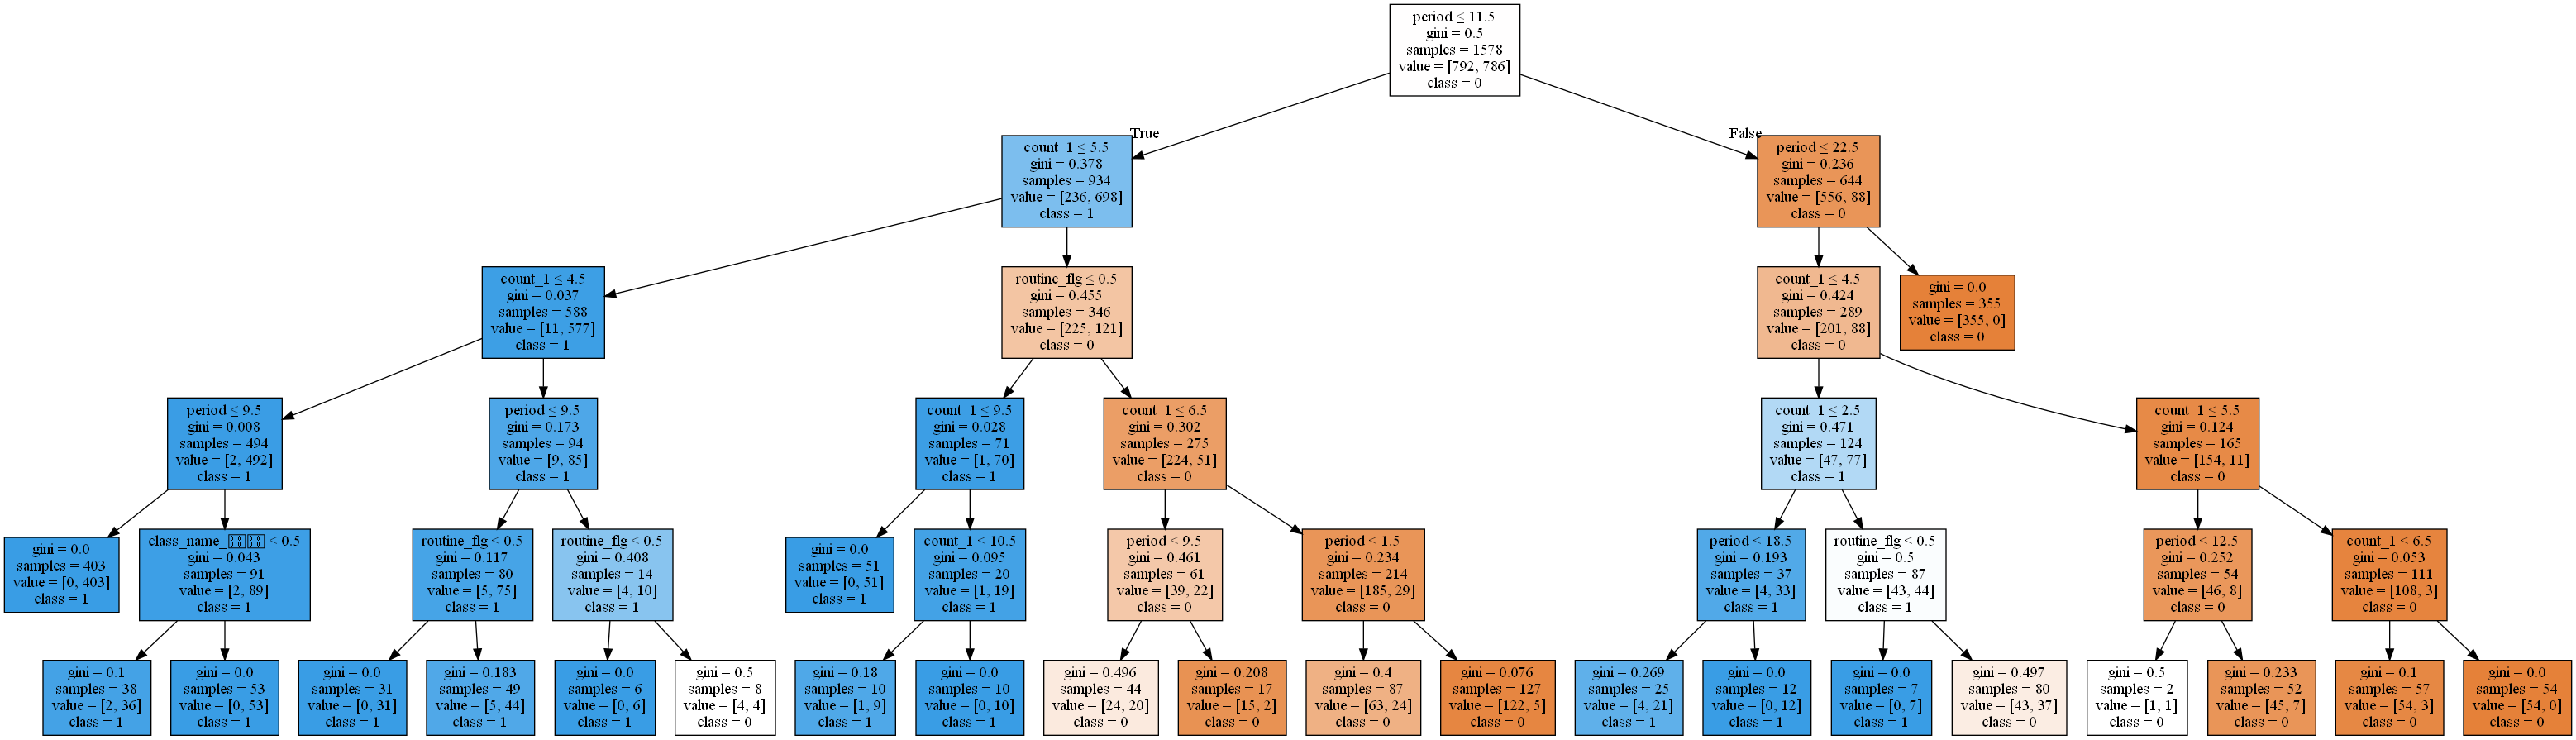

In [27]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.core.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names = X.columns, class_names =target_name, filled=True, special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())